# CPS600 - Python Programming for Finance 
###  
<img src="https://www.syracuse.edu/wp-content/themes/g6-carbon/img/syracuse-university-seal.svg?ver=6.3.9" style="width: 200px;"/>

## Term Project

###  December 4, 2018

Recall that we used the *Black-Scholes-Merton* equation for *geometric Brownian motion*

$$ S_T = S_0\exp((r-\frac{1}{2}\sigma^2)T + \sigma\sqrt{T}z)$$

(See the examples in the *Stochastics* notebooks.)

We didn't quite make it to the topic of **square-root diffusion**. Let's do that one now:

$$ dx_t = \kappa (\theta - x_t)dt + \sigma \sqrt{x_t}dZ_t$$

The values of these terms are as follows

* $x_t$ is the process level at date t
* $\kappa$ is the mean-reversion factor
* $\theta$ is the long-term mean of the process
* $\sigma$ is the constant volatility parameter
* $Z$, as before, is the *standard Brownian motion* variable

Applying Euler's method to the above differential equation yields

$$\tilde{x_t} = \tilde{x_s} + \kappa(\theta - \tilde{x_s})\Delta t + \sigma \sqrt{\tilde{x_s}^+}\sqrt{\Delta t} z_t $$

$$ x_t = \tilde{x_t}^+ $$

What does this notation $x^+$ mean? It is the *maximum of $x$ and $0$*.

Now we will initialize the parameters and start the *discretization*:

In [1]:
x0, kappa, theta, sigma = 0.05, 3.0, 0.02, 0.1

In [2]:
T = 2.0
M = 50
I, dt = 10000, T / M

In [3]:
import numpy as np
import numpy.random as npr
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
                    + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
                    + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt)
                    * npr.standard_normal(I))
    return np.maximum(xh, 0)
x1 = srd_euler()

Now we run the simulation and view the results in a histogram and path form.

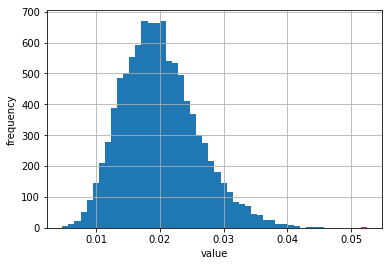

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(x1[-1],bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

Now, the first $10$ simulated paths:

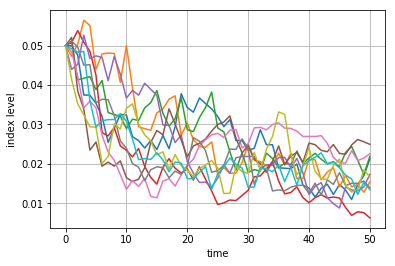

In [5]:
plt.plot(x1[:,:10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

We can get results that are mathematically more precise using another method:

$$ x_t = \frac{\sigma^2(1 - e^{-\kappa \Delta t})}{4 \kappa} \chi'^2_d\Big(\frac{4 \kappa e^{-\kappa \Delta t}}{\sigma^2(1 - e^{-\kappa \Delta t})}x_s\Big) $$

And here is the Python implementation:

In [6]:
def srd_exact():
    x2 = np.zeros((M + 1, I))
    x2[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x2[t - 1]
        x2[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x2
x2 = srd_exact()

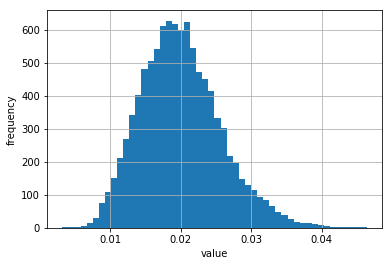

In [7]:
plt.hist(x2[-1],bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

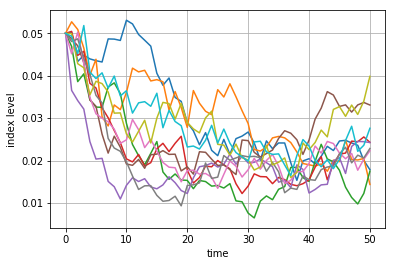

In [8]:
plt.plot(x2[:,:10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)